## **Projeto de Análise de Dados**

---

### **Objetivo do projeto**: Construir modelo de Machine Learning por meio da linguagem de programação Python. 

---

#### **Processo de Análise**: vamos utilizar o modelo de *Regressão Linear* para predição de custos de Plano de Saúde.

---

#### Vamos analisar a base de dados de planos de saúde dos EUA. Os dados são secundários, e podem ser encontrados aqui. Contêm 1338 linhas e 6 colunas que apresentam as informações: idade, sexo, fumante, região e total gasto com o seguro. O objetivo dessa análise é determinar quais fatores e efeitos elevam o custo do seguro e criar modelo de Regressão Linear Múltipla que possa prever o custo do seguro de saúde com base nos fatores que o influenciam. 

### Sumário:
 1. O que é Regressão?
 2. Análise exploratória de dados
 3. Modelo de Regressão Linear
 4. Performance do modelo

---

#### Um dos primeiros modelos estatíscos e de Machine Learning que analisamos é o modelo de **Regressão Linear**

#### Regressão Linear é uma equação que pode estimar um determinado alvo(variável y ou depedente ou endógena), dado os valores de outras variáveis(variável x, ou explicativa, ou regressor, ou independente).

#### A reta de regressão depende de cinco estatísticas: a média de x, desvio padrão de x, média de y, desvio padrão de y, correlação de x e y.

---

### Análise exploratória de dados

#### Importar as bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

---

#### Data Frame do dados

In [8]:
dataFrame = pd.read_csv('insurance.csv')

In [9]:
dataFrame.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
dataFrame.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


---

#### Tratamento de dados categóricos

In [43]:
label = LabelEncoder()

#sex
label.fit(dataFrame.sex)
dataFrame.sex = label.transform(dataFrame.sex)

#smoker
label.fit(dataFrame.smoker)
dataFrame.smoker = label.transform(dataFrame.smoker)

#region
label.fit(dataFrame.region)
dataFrame.region = label.transform(dataFrame.region)

In [46]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [48]:
corr = dataFrame.corr()
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


<Axes: >

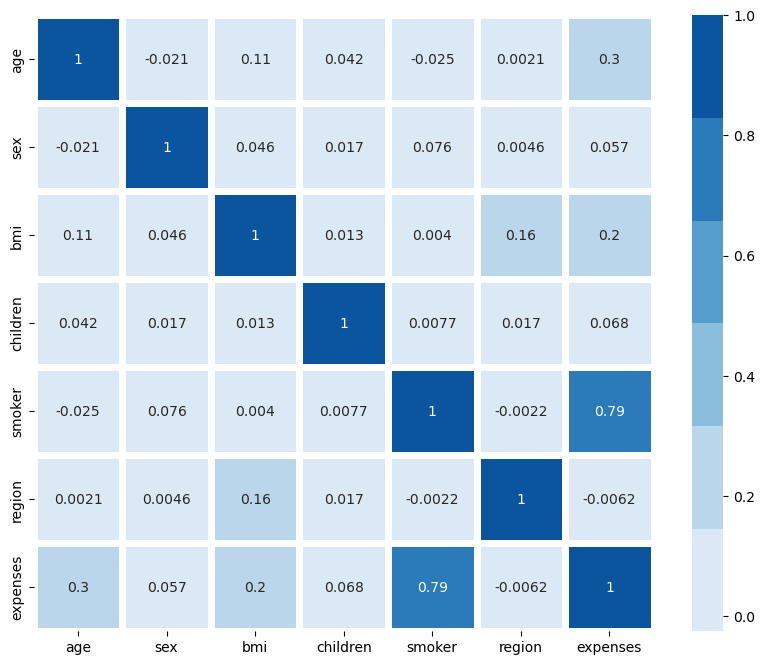

In [55]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=5, annot=True)

#### Nesse gráfico podemos observar que fumantes possui uma forte correlação com gastos em saúde.

---

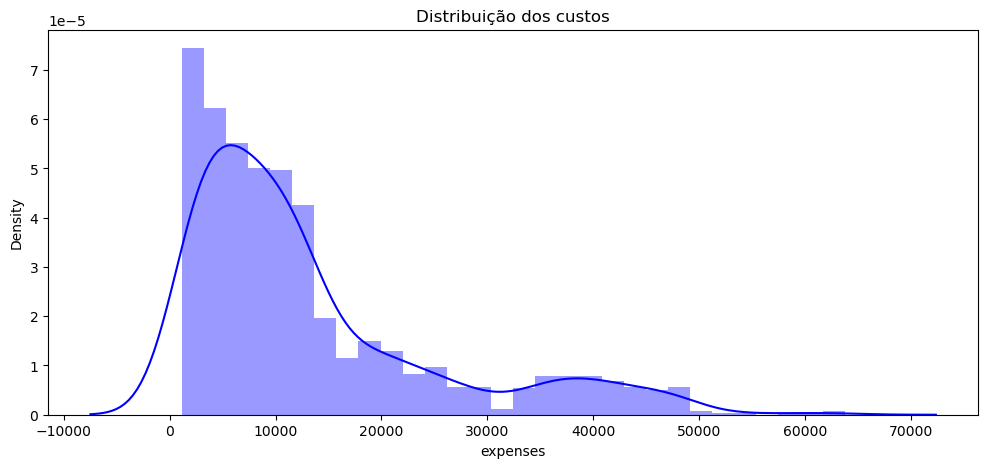

In [58]:
#Distribuição de custos

plt.figure(figsize=(12,5))
plt.title("Distribuição dos custos")
ax = sns.distplot(dataFrame["expenses"], color='b')

---

Text(0.5, 1.0, 'Distribuição de gastos por não fumantes')

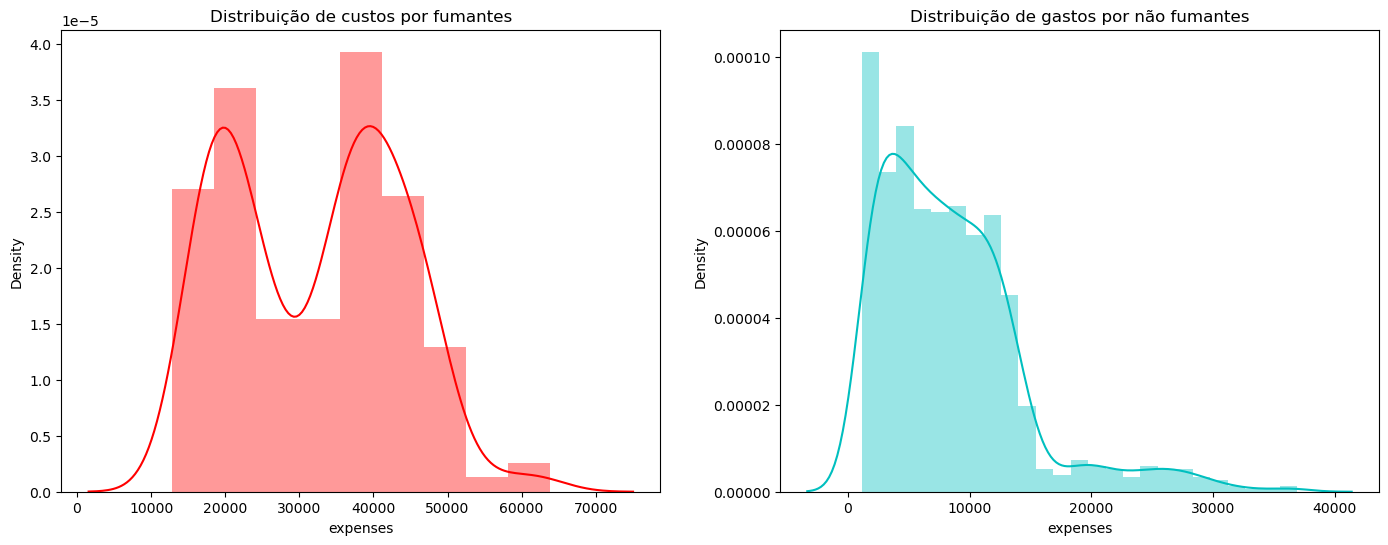

In [62]:
#Distribuição dos custos dos fumantes e não fumantes

fig = plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.distplot(dataFrame[(dataFrame.smoker == 1)]["expenses"], color='r', ax=ax)
ax.set_title('Distribuição de custos por fumantes')

ax=fig.add_subplot(122)
sns.distplot(dataFrame[(dataFrame.smoker == 0)] ['expenses'], color='c', ax=ax)
ax.set_title('Distribuição de gastos por não fumantes')

---

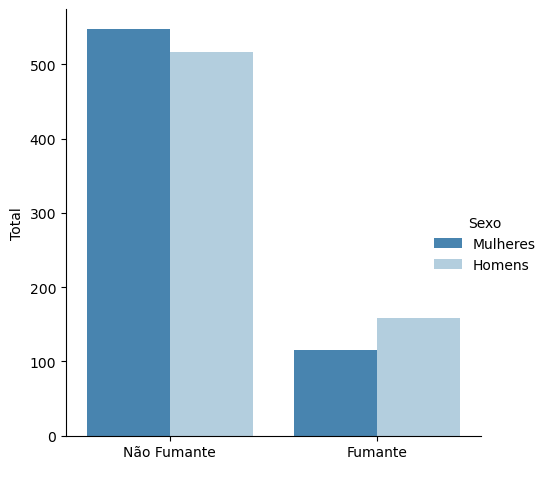

In [73]:
gastos = sns.catplot(x="smoker", kind="count", hue="sex", palette="Blues_r", data=dataFrame, legend_out=True)
(gastos.set_axis_labels(" ", "Total")
    .set_xticklabels(["Não Fumante", "Fumante" ])
)

gastos._legend.set_title("Sexo")
new_labels = ['Mulheres', 'Homens']
for t, l in zip(gastos._legend.texts, new_labels): t.set_text(l)